In [82]:
import numpy as np
import pandas as pd

In [83]:
df=pd.read_csv("reviews_sentiment")

In [84]:
df

,Review text,Text_cleaned,polarity,sentiment
0,"Nice product, good quality, but price is now r...",nice product good quality price rising bad sig...,0.9110,positive
1,They didn't supplied Yonex Mavis 350. Outside ...,didnt supplied yonex mavis 350 outside cover y...,-0.4767,negative
2,Worst product. Damaged shuttlecocks packed in ...,worst product damaged shuttlecock packed new b...,-0.9146,negative
3,"Quite O. K. , but nowadays the quality of the...",quite k nowadays quality cork like not 3 5 yea...,0.8979,positive
4,Over pricedJust â?¹620 ..from retailer.I didn'...,pricedjust 620 retaileri didnt understand wat ...,-0.1877,negative
...,...,...,...,...
4978,Delivered before time but price is high from m...,delivered time price high marke,0.0000,negative
4979,up to the mark but same is available in market...,mark available market le price,0.0000,negative
4980,Nice delivery spee,nice delivery spee,0.4215,positive
4981,No complaints about the item . Its the best on...,no complaint item best one way priced easily a...,0.4939,positive


In [85]:
df.drop(["polarity","Text_cleaned"],axis=1,inplace=True)

In [86]:
df

,Review text,sentiment
0,"Nice product, good quality, but price is now r...",positive
1,They didn't supplied Yonex Mavis 350. Outside ...,negative
2,Worst product. Damaged shuttlecocks packed in ...,negative
3,"Quite O. K. , but nowadays the quality of the...",positive
4,Over pricedJust â?¹620 ..from retailer.I didn'...,negative
...,...,...
4978,Delivered before time but price is high from m...,negative
4979,up to the mark but same is available in market...,negative
4980,Nice delivery spee,positive
4981,No complaints about the item . Its the best on...,positive


In [87]:
df["Review text"]=df["Review text"].str.replace(".READ MORE","")

C:\Users\ravinder\AppData\Local\Temp\ipykernel_24228\2881371563.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Review text"]=df["Review text"].str.replace(".READ MORE","")


In [88]:
df.rename(columns={"Review text":"text"},inplace=True)

In [89]:
df

,text,sentiment
0,"Nice product, good quality, but price is now r...",positive
1,They didn't supplied Yonex Mavis 350. Outside ...,negative
2,Worst product. Damaged shuttlecocks packed in ...,negative
3,"Quite O. K. , but nowadays the quality of the...",positive
4,Over pricedJust â?¹620 ..from retailer.I didn'...,negative
...,...,...
4978,Delivered before time but price is high from m...,negative
4979,up to the mark but same is available in market...,negative
4980,Nice delivery spee,positive
4981,No complaints about the item . Its the best on...,positive


In [90]:
df["text"][0]

'Nice product, good quality, but price is now rising which is a bad sign. 800-850 was an affordable price, especially when we play everyday. So kindly help us out in terms of the price. Thank You'

In [91]:
from wordcloud import WordCloud

wc = WordCloud(background_color='black',
               width=1600,
               height=800).generate(' '.join(df['text']))

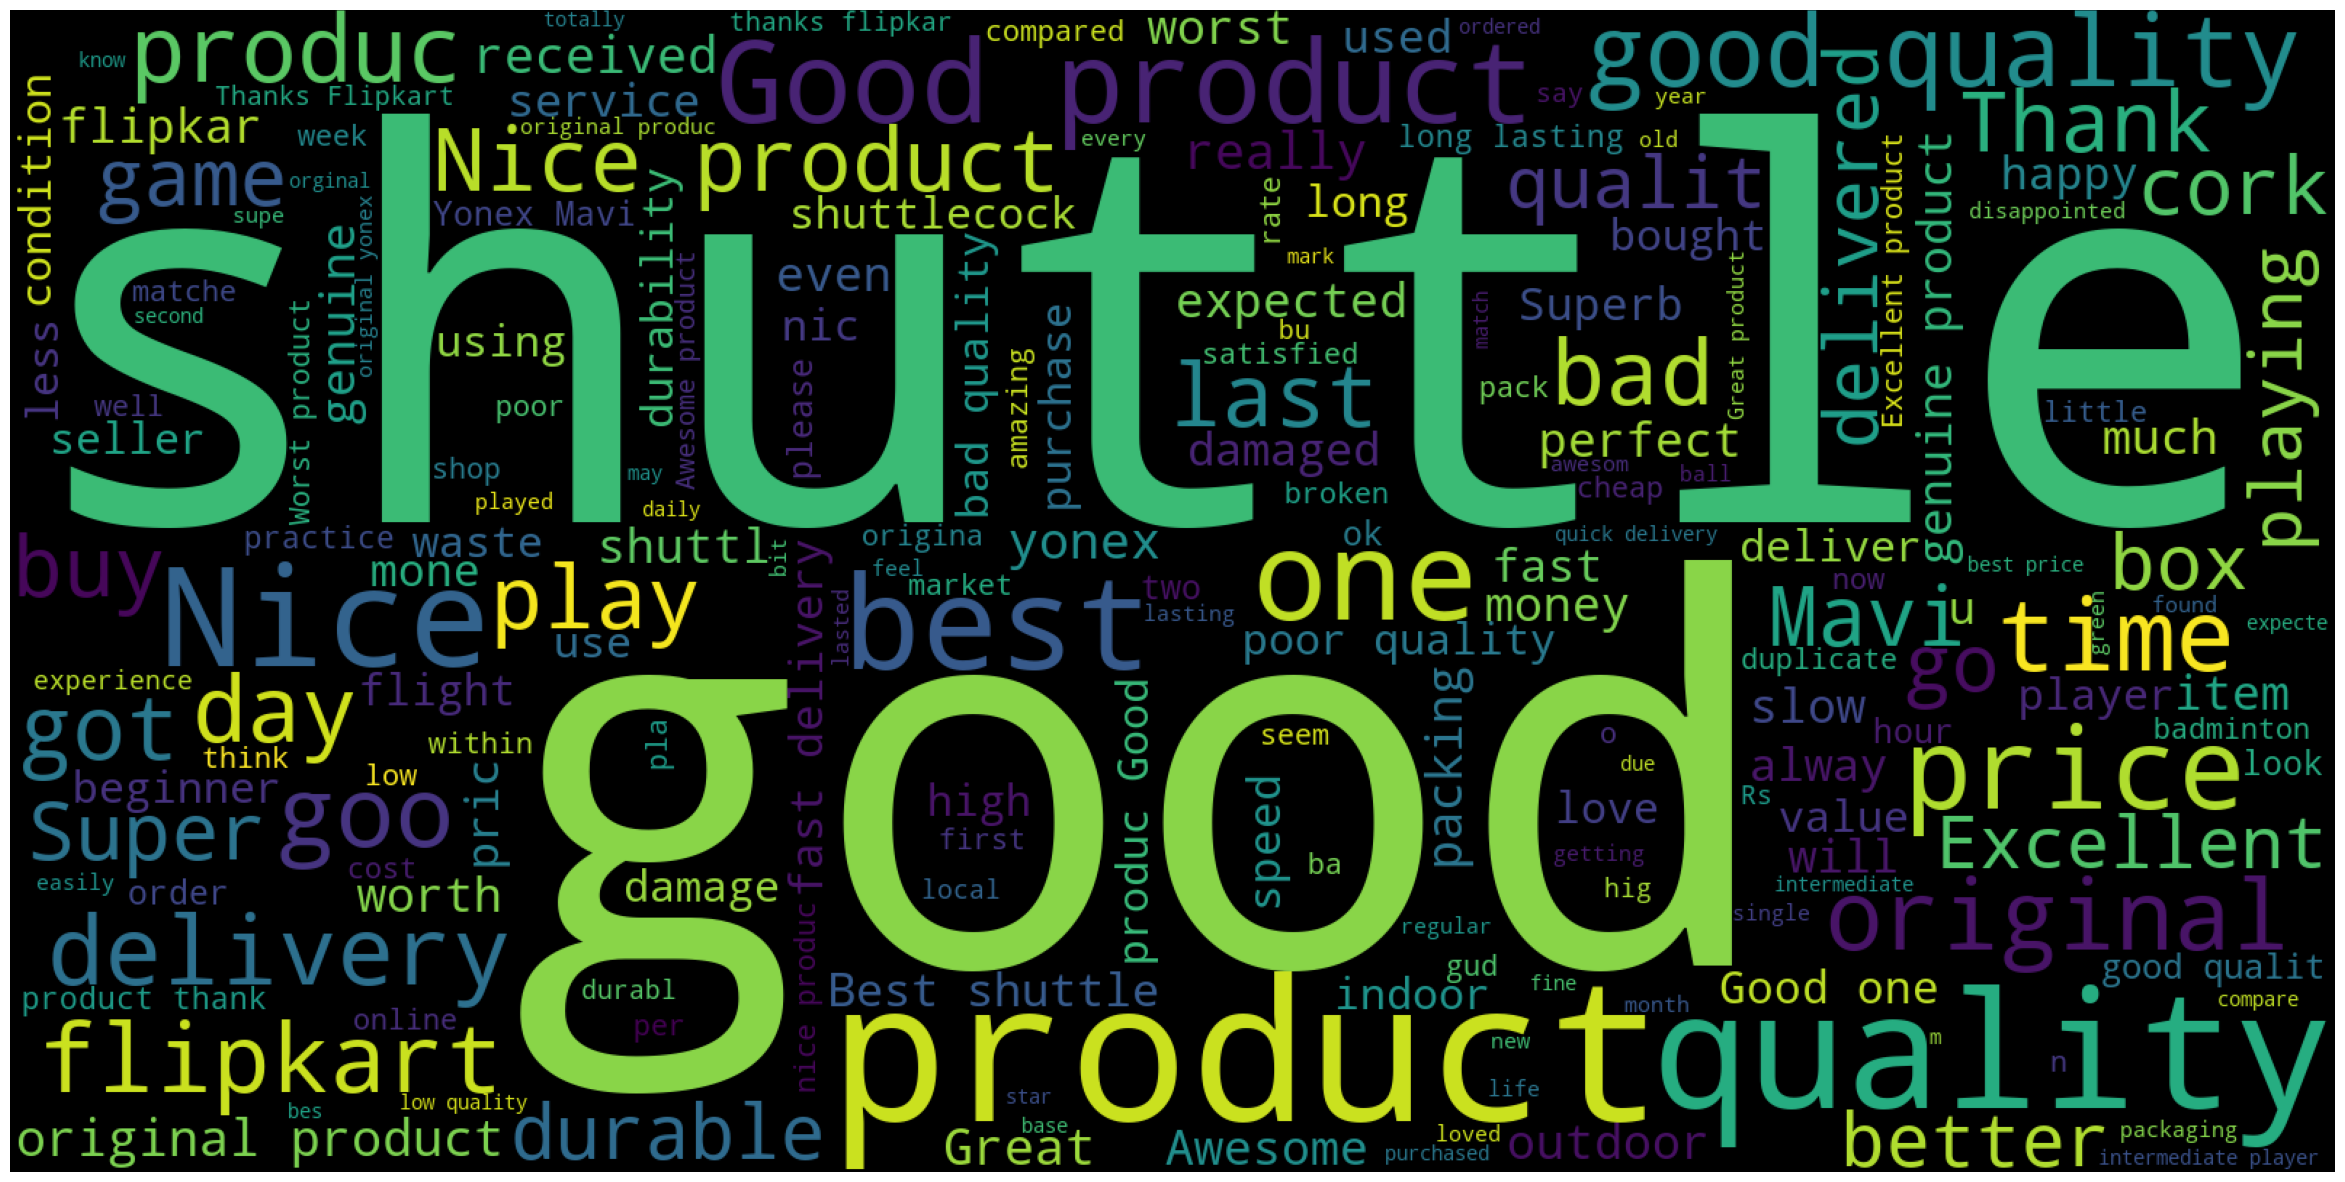

In [92]:
import matplotlib.pyplot as plt

plt.figure(1,figsize=(30,20))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [93]:
X = df.text  
y = df.sentiment
print(X.shape, y.shape)

(4983,) (4983,)


In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3737,) (3737,)
(1246,) (1246,)


In [95]:
import string

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import emoji
import re

# Initialize WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

In [102]:
sw=stopwords.words("english")

In [103]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [104]:
rem=["aren't",
 'couldn',
 "couldn't",
 'didn',
 "didn't",
 'doesn',
 "doesn't",
 'hadn',
 "hadn't",
 'hasn',
 "hasn't",
 'haven',
 "haven't",
 'isn',
 "isn't",
 'ma',
 'mightn',
 "mightn't",
 'mustn',
 "mustn't",
 'needn',
 "needn't",
 'shan',
 "shan't",
 'shouldn',
 "shouldn't",
 'wasn',
 "wasn't",
 'weren',
 "weren't",
 'won',
 "won't",
 'wouldn',
 "wouldn't",
    "no","not"]

In [105]:
for i in rem:
    sw.remove(i)

In [106]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [107]:
def clean_text(doc):
    doc = doc.lower()
    doc=emoji.demojize(doc).replace(':','')
    doc = re.sub(r'[^A-z0-9 ]+','',doc)
    doc_list = doc.split()
    doc_list = [word for word in doc_list if word not in sw]
    doc_list = [lemmatizer.lemmatize(i) for i in doc_list]
    return " ".join(doc_list)

In [108]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(preprocessor=clean_text)


X_train_dtm = vect.fit_transform(X_train)

print(X_train_dtm.shape)

(3737, 3048)


In [109]:
X_test_dtm = vect.transform(X_test)

print(X_test_dtm.shape)

(1246, 3048)


In [110]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB() 
nb.fit(X_train_dtm, y_train)

MultinomialNB()

In [111]:
from sklearn import metrics

y_train_pred = nb.predict(X_train_dtm)

metrics.accuracy_score(y_train, y_train_pred)

0.9162429756489162

In [112]:
metrics.confusion_matrix(y_train, y_train_pred)

array([[1206,  246],
       [  67, 2218]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted')

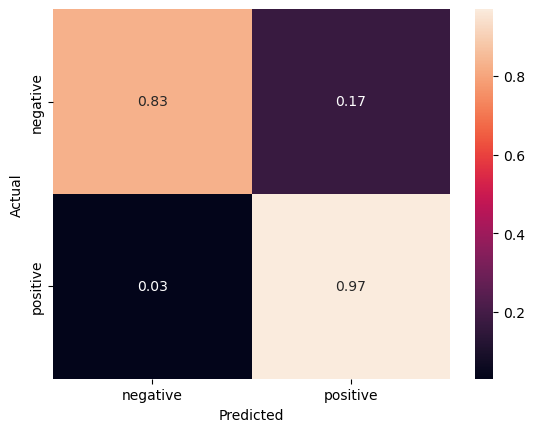

In [113]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

cm = metrics.confusion_matrix(y_train, y_train_pred)
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [114]:
y_test_pred = nb.predict(X_test_dtm)

metrics.accuracy_score(y_test, y_test_pred)

0.8186195826645265

Text(0.5, 23.52222222222222, 'Predicted')

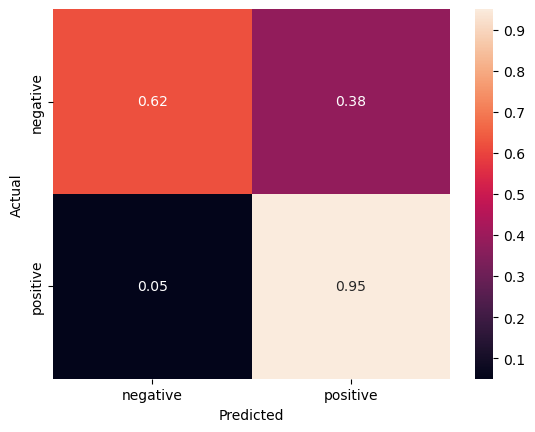

In [115]:
cm = metrics.confusion_matrix(y_test, y_test_pred)
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [116]:
import joblib
from joblib import Memory

import os

In [117]:
from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

In [118]:
X_train_clean = X_train.apply(lambda doc: clean_text(doc))

In [119]:
X_test_clean = X_test.apply(lambda doc: clean_text(doc))

In [120]:
# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

# Define the pipeline with caching
pipe = Pipeline(
    [
        ('vectorization', CountVectorizer()),
        ('nb', MultinomialNB())
    ], 
    memory=memory
)

MAX_FEATURES = [1000, 1500, 2000]
ALPHA = [1, 10]

# Observe the Key Value Pair format
parameter_grid = [
    {
        'vectorization__max_features': MAX_FEATURES,
        'nb__alpha': ALPHA
    }
]

clf = GridSearchCV(
    estimator=pipe,
    param_grid=parameter_grid,
    scoring='accuracy',
    cv=5,
    return_train_score=True,
    verbose=1
)

%time clf.fit(X_train_clean, y_train)

print("Best estimator found on train set")
print(clf.best_estimator_)
print()

print('Score on Test Data: ', clf.score(X_test_clean, y_test))

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\ravinder\.jupyter\programmes\Lib\site-packages\sklearn\pipeline.py:370: UserWarning: Persisting input arguments took 0.68s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


CPU times: total: 10.7 s
Wall time: 12.3 s
Best estimator found on train set
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=1000)),
                ('nb', MultinomialNB(alpha=1))])

Score on Test Data:  0.8274478330658106


In [121]:
# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

pipelines = {
    'naive_bayes': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', MultinomialNB())
    ], memory=memory),
    'logistic_regression': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', LogisticRegression())
    ], memory=memory),
    'decision_tree': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ], memory=memory)
}

# Define parameter grid for each algorithm
param_grids = {
    'naive_bayes': [
        {
            'vectorization': [CountVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000], 
            'classifier__alpha' : [1, 10]
        }
    ],
    'logistic_regression': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000], 
            'classifier__C': [0.1, 1, 10], 
            'classifier__penalty': ['elasticnet'], 
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga'],
            'classifier__class_weight': ['balanced']
        }
    ],
    'decision_tree': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__max_depth': [None, 5, 10]
        }
    ]
}

# Perform GridSearchCV for each algorithm
best_models = {}

for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo], 
                               param_grid=param_grids[algo], 
                               cv=5, 
                               scoring='accuracy', 
                               return_train_score=True,
                               verbose=1
                              )
    
    %time grid_search.fit(X_train_clean, y_train)
    
    best_models[algo] = grid_search.best_estimator_
    
    print('Score on Test Data: ', grid_search.score(X_test_clean, y_test))

********** naive_bayes **********
Fitting 5 folds for each of 8 candidates, totalling 40 fits
CPU times: total: 8.88 s
Wall time: 9.92 s
Score on Test Data:  0.8274478330658106
********** logistic_regression **********
Fitting 5 folds for each of 72 candidates, totalling 360 fits


C:\Users\ravinder\.jupyter\programmes\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ravinder\.jupyter\programmes\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ravinder\.jupyter\programmes\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ravinder\.jupyter\programmes\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ravinder\.jupyter\programmes\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ravinder\.jupyter\programmes\Lib\sit

C:\Users\ravinder\.jupyter\programmes\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ravinder\.jupyter\programmes\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ravinder\.jupyter\programmes\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ravinder\.jupyter\programmes\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ravinder\.jupyter\programmes\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ravinder\.jupyter\programmes\Lib\sit

C:\Users\ravinder\.jupyter\programmes\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ravinder\.jupyter\programmes\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ravinder\.jupyter\programmes\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ravinder\.jupyter\programmes\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ravinder\.jupyter\programmes\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ravinder\.jupyter\programmes\Lib\sit

C:\Users\ravinder\.jupyter\programmes\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ravinder\.jupyter\programmes\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ravinder\.jupyter\programmes\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ravinder\.jupyter\programmes\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ravinder\.jupyter\programmes\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ravinder\.jupyter\programmes\Lib\sit

C:\Users\ravinder\.jupyter\programmes\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ravinder\.jupyter\programmes\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ravinder\.jupyter\programmes\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ravinder\.jupyter\programmes\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ravinder\.jupyter\programmes\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ravinder\.jupyter\programmes\Lib\sit

CPU times: total: 10min 6s
Wall time: 10min 30s
Score on Test Data:  0.9430176565008026
********** decision_tree **********
Fitting 5 folds for each of 24 candidates, totalling 120 fits
CPU times: total: 49.5 s
Wall time: 52.6 s
Score on Test Data:  0.9446227929373997


In [122]:
for name, model in best_models.items():
    print(f"{name}")
    print(f"{model}")
    print()

naive_bayes
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=1000)),
                ('classifier', MultinomialNB(alpha=1))])

logistic_regression
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=2000)),
                ('classifier',
                 LogisticRegression(C=10, class_weight='balanced', l1_ratio=0.6,
                                    penalty='elasticnet', solver='saga'))])

decision_tree
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=5000)),
                ('classifier', DecisionTreeClassifier())])



In [123]:
for name, model in best_models.items():
    print("*"*10, name, "*"*10)
    
    joblib.dump(model, f'{name}.pkl')
    model = joblib.load(f'{name}.pkl')
    
    %time y_test_pred = model.predict(X_test_clean)
    print("Accuracy Score", metrics.accuracy_score(y_test, y_test_pred))
    
    print("Model Size:", os.path.getsize(f'{name}.pkl'), "Bytes")

********** naive_bayes **********
CPU times: total: 46.9 ms
Wall time: 23.7 ms
Accuracy Score 0.8274478330658106
Model Size: 88230 Bytes
********** logistic_regression **********
CPU times: total: 15.6 ms
Wall time: 16.3 ms
Accuracy Score 0.9430176565008026
Model Size: 93465 Bytes
********** decision_tree **********
CPU times: total: 31.2 ms
Wall time: 15.6 ms
Accuracy Score 0.9446227929373997
Model Size: 120920 Bytes


In [125]:
bayes = joblib.load('naive_bayes.pkl')
log = joblib.load('naive_bayes.pkl')
dec = joblib.load('naive_bayes.pkl')



In [183]:
rev="i love it"

In [184]:
prediction = bayes.predict([rev])

print("Prediction:", prediction)

Prediction: ['positive']


In [185]:
prediction = log.predict([rev])

print("Prediction:", prediction)

Prediction: ['positive']


In [186]:
prediction = dec.predict([rev])

print("Prediction:", prediction)

Prediction: ['positive']
